In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import string
import re
nltk.download('stopwords')
steemer=nltk.SnowballStemmer("english")

[nltk_data] Downloading package stopwords to C:\Users\Sayed Al
[nltk_data]     Rafi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


###### The code you provided imports various modules and resources from the Natural Language Toolkit (NLTK) library in Python. Let's break it down:

1. `import nltk`: This line imports the nltk module, which is the main module of the NLTK library. NLTK is a powerful library for natural language processing tasks in Python.

2. `from nltk.sentiment.vader import SentimentIntensityAnalyzer`: This line imports the SentimentIntensityAnalyzer class from the vader module in NLTK. The SentimentIntensityAnalyzer is a pre-trained model specifically designed for sentiment analysis of text.

3. `from nltk.corpus import stopwords`: This line imports the stopwords module from the nltk.corpus package. Stopwords are commonly used words (such as "and", "the", "is") that are often removed from text during text processing tasks.

4. `import string`: This line imports the string module, which provides a set of common string operations and constants, such as punctuation characters.

5. `import re`: This line imports the re module, which provides regular expression pattern matching operations. Regular expressions are useful for manipulating and processing text.

6. `nltk.download('stopwords')`: This line downloads the NLTK stopwords corpus if it has not been downloaded already. The stopwords corpus contains a collection of stopwords in multiple languages, which can be useful for text preprocessing tasks.

7. `steemer = nltk.SnowballStemmer("english")`: This line creates an instance of the SnowballStemmer class from the nltk.stem package. The SnowballStemmer is a stemming algorithm that reduces words to their base or root form. In this case, the SnowballStemmer is initialized with the "english" language, indicating that it will be used for stemming English words.

Overall, this code sets up the necessary resources and tools for performing text processing and sentiment analysis using NLTK. It imports modules for sentiment analysis, stopwords, string operations, and regular expressions. Additionally, it downloads the stopwords corpus if necessary and initializes a SnowballStemmer for stemming English words.

#### Stemming is a text processing technique used in natural language processing (NLP) and information retrieval to reduce words to their base or root form, known as the "stem." The purpose of stemming is to transform words with different inflections or variations to a common base form so that they can be treated as the same word and grouped together, even if they have different endings or prefixes.

For example, consider the following words: "run," "running," "runs," and "ran." These words all share the same root concept, "run." By applying stemming, they would be reduced to their base form "run," making it easier to analyze and process them as a single entity.

Stemming algorithms work by removing common word endings or suffixes, such as "-ing," "-ed," "-s," etc., to extract the stem. Although the resulting stems may not always be actual words, they represent the core meaning of the original words and help in various NLP tasks.

Stemming is useful in several NLP applications:

1. Information Retrieval: When building search engines or performing document retrieval, stemming ensures that users can find relevant documents, even if they use different word forms in their queries.

2. Text Classification: In tasks like sentiment analysis or spam detection, stemming allows the system to recognize patterns and common themes regardless of word variations.

3. Indexing and Tokenization: In the preprocessing stage of text data, stemming reduces the vocabulary size and simplifies the text representation, making it more manageable for further analysis.

4. Language Modeling: Stemming can be used to create word frequency statistics without counting every inflection separately, thus reducing the complexity of language models.

While stemming is a helpful technique, it's essential to note that it may not always produce accurate results. Some stems might be very different from the original words, leading to loss of information or ambiguity. For more advanced and precise text processing tasks, techniques like lemmatization (which transforms words to their dictionary or base form) may be preferred over simple stemming.

In [2]:
data=pd.read_csv('Desktop/tiktok_google_play_reviews.csv')

C:\Users\Sayed Al Rafi\AppData\Local\Temp\ipykernel_42444\2733942875.py:1: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('Desktop/tiktok_google_play_reviews.csv')


In [3]:
data

reviewId              userName  \
0       68ccaec8-1415-4301-a85e-3004679a3a83          Cassie Moore   
1       d84cbfd3-6aa3-485c-aaf9-c5dca27dc966         Kaleb Plummer   
2       96618aa1-31e5-4259-8649-89b75d962f00           Rylee Maher   
3       078c0bda-598b-474e-a04e-d7cb3e6f6301  Kittykatelyn Romilly   
4       8e68c5cd-b12a-4206-a8da-6bfdbff44ae3      Loveness Malenga   
...                                      ...                   ...   
460282  73cf78fe-599d-4488-8a8b-ae443847303b           hera killar   
460283  16d331c8-ba21-4aeb-ac01-dec455ca48ad        Hiox Softwares   
460284  fbb86777-b885-4f76-b49e-13e424aa5afc       Md. Zahid Hasan   
460285  28df682c-bb17-4224-8658-642a92a2c723              Ash Ryan   
460286  1cfbb2b3-fb0b-4f4b-8963-9e2b803f24dc           Haroon Jaan   

                                                userImage  \
0       https://play-lh.googleusercontent.com/a/ALm5wu...   
1       https://play-lh.googleusercontent.com/a-/ACNPE...   
2       https://play-lh.googleusercontent.com/a/ALm5wu...   
3       https://play-lh.googleusercontent.com/a-/ACNPE...   
4       https://play-lh.googleusercontent.com/a-/ACNPE...   
...                                                   ...   
460282  https://play-lh.googleusercontent.com/a-/ACNPE...   
460283  https://play-lh.googleusercontent.com/a/ALm5wu...   
460284  https://play-lh.googleusercontent.com/a-/ACNPE...   
460285  https://play-lh.googleusercontent.com/a-/ACNPE...   
460286  https://play-lh.googleusercontent.com/a/ALm5wu...   

                                                  content  score  \
0                                                No words      5   
1                                   Great fun app so far!      5   
2       The app would get a higher rating but I litera...      1   
3       I WISH I COULD GIVE THIS A 100 PERCENT RATING ...      5   
4                                     Pictures and record      5   
...                                                   ...    ...   
460282                                                 😍😍      5   
460283                                          Very nice      1   
460284                                               Nice      5   
460285                               TikTok love your sad      5   
460286                             Good to use haroon_231      5   

        thumbsUpCount reviewCreatedVersion                   at replyContent  \
0                   0               27.1.3  2022-11-29 21:55:37          NaN   
1                   0                  NaN  2022-11-29 21:55:04          NaN   
2                   0               27.1.3  2022-11-29 21:54:48          NaN   
3                   0                  NaN  2022-11-29 21:54:35          NaN   
4                   0                  NaN  2022-11-29 21:54:21          NaN   
...               ...                  ...                  ...          ...   
460282              0                  NaN  2022-06-18 12:35:32          NaN   
460283              0                  NaN  2022-06-18 12:35:25          NaN   
460284              0               24.8.3  2022-06-18 12:34:39          NaN   
460285              0                  NaN  2022-06-18 12:34:38          NaN   
460286              0               24.8.3  2022-06-18 12:34:32          NaN   

       repliedAt  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  
...          ...  
460282       NaN  
460283       NaN  
460284       NaN  
460285       NaN  
460286       NaN  

[460287 rows x 10 columns]

In [4]:
data.corr()

C:\Users\Sayed Al Rafi\AppData\Local\Temp\ipykernel_42444\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


score  thumbsUpCount
score          1.000000      -0.012835
thumbsUpCount -0.012835       1.000000

#### On the first impressions of this dataset, I can see null values in some columns. To analyze TikTok reviews, we only need two columns, content and score;
So let’s create a new dataset with just these two columns and take a step further with TikTok reviews sentiment analysis:

In [5]:
data=data[["content","score"]]
print(data.head())

                                             content  score
0                                           No words      5
1                              Great fun app so far!      5
2  The app would get a higher rating but I litera...      1
3  I WISH I COULD GIVE THIS A 100 PERCENT RATING ...      5
4                                Pictures and record      5


#### Now let’s see whether any of these two columns contain any null values:

In [6]:
print(data.isnull().sum())

content    16
score       0
dtype: int64


#### So there are sixteen null values in the content column. Let’s drop the null values and move further:

In [7]:
data=data.dropna()

#### Now let’s prepare this data for the task of sentiment analysis. Here we have to clean the text in the content column:

In [8]:
import nltk
import string
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download stopwords if needed
nltk.download('stopwords')

stopword = set(stopwords.words('english'))
stemmer = PorterStemmer()

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text = " ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text = " ".join(text)
    return text

data["content"] = data["content"].apply(clean)


[nltk_data] Downloading package stopwords to C:\Users\Sayed Al
[nltk_data]     Rafi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


###### The code you provided defines a function named `clean()` that performs text cleaning and preprocessing on a given input text. It is applied to the 'content' column of a DataFrame named `data` using the `apply()` method. Let's break down the function and its steps:

1. `stopword = set(stopwords.words('english'))`: This line uses the `stopwords.words('english')` function from NLTK to retrieve a set of English stopwords. These are commonly used words that often do not carry much meaning and are frequently removed from text during preprocessing.

2. `def clean(text)`: This line defines the `clean()` function, which takes a text input as an argument.

3. `text = str(text).lower()`: This line converts the input text to lowercase using the `lower()` method. This ensures that all words are in lowercase for consistency.

4. `text = re.sub('\[.*?\]', '', text)`: This line uses regular expressions (`re.sub()`) to remove any text enclosed in square brackets. This can be useful for removing any bracketed content, such as citations or references.

5. `text = re.sub('https?://\S+|www\.\S+', '', text)`: This line uses regular expressions to remove URLs starting with 'http://' or 'https://' as well as URLs starting with 'www.' from the text. This step removes any web links or URLs present in the text.

6. `text = re.sub('<.*?>+', '', text)`: This line uses regular expressions to remove any HTML tags (enclosed in angle brackets) from the text.

7. `text = re.sub('[%s]' % re.escape(string.punctuation), '', text)`: This line uses regular expressions to remove any punctuation marks from the text. The `string.punctuation` constant from the string module contains a string of all punctuation characters.

8. `text = re.sub('\n', '', text)`: This line uses regular expressions to remove newline characters ('\n') from the text.

9. `text = re.sub('\w*\d\w*', '', text)`: This line uses regular expressions to remove any alphanumeric strings containing digits from the text. This step removes any alphanumeric combinations that have numbers in them.

10. `text = [word for word in text.split(' ') if word not in stopword]`: This line splits the text into individual words and creates a list comprehension to filter out any words that are in the `stopword` set. This step removes stopwords from the text.

11. `text = " ".join(text)`: This line joins the remaining words in the list back into a single string, separated by spaces.

12. `text = [stemmer.stem(word) for word in text.split(' ')]`: This line splits the text into individual words again and applies stemming using the `stemmer` (SnowballStemmer) object. Stemming reduces words to their base or root form.

13. `text = " ".join(text)`: This line joins the stemmed words back into a single string, separated by spaces.

14. `return text`: This line returns the cleaned and preprocessed text.

15. `data["content"] = data["content"].apply(clean)`: This line applies the `clean()` function to the 'content' column of the DataFrame `data`, modifying the 'content' column with the cleaned and preprocessed text.

Overall, this code defines a function that performs various text cleaning operations, such as converting to lowercase, removing URLs, HTML tags, punctuation, stopwords, and performing stemming. It then applies this function to the 'content' column of a DataFrame to clean and preprocess the text in that column.

#### Now let’s have a look at the percentages of ratings given to TikTok on the Google Play store:

In [9]:
ratings=data["score"].value_counts()
numbers=ratings.index
quantity=ratings.values
import plotly.express as px
figure=px.pie(data,values=quantity,names=numbers,hole=0.5)
figure.show()

#### You can see that 73.6% of the users have given five ratings to TikTok, and 12.1% of the users have rated it with 1. Now let’s have a look at the kind of words the users use in the reviews of TikTok:

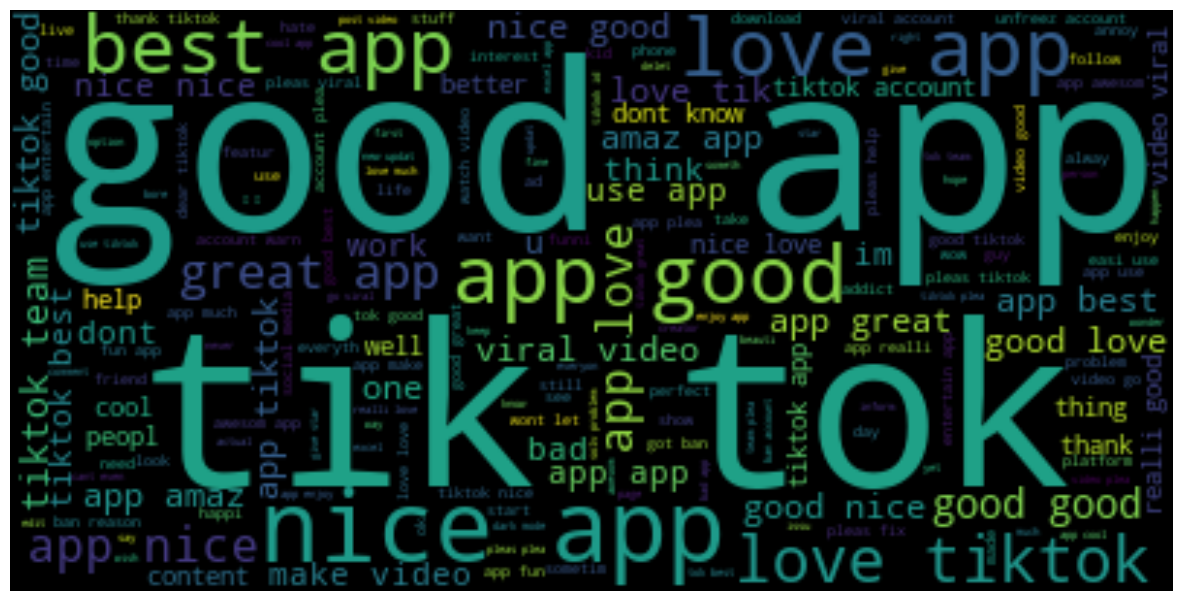

In [10]:
text= " ".join(i for i in data.content)
stopwords=set(STOPWORDS)
wordcloud=WordCloud(stopwords=stopwords,background_color="black").generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

###### The code you provided generates a word cloud visualization based on the text data in the 'content' column of the `data` DataFrame. Let's break it down:

1. `text = " ".join(i for i in data.content)`: This line joins all the text values in the 'content' column of the `data` DataFrame into a single string. Each text value is separated by a space, creating a long string of all the text combined.

2. `stopwords = set(STOPWORDS)`: This line creates a set of stopwords using the `STOPWORDS` set provided by the WordCloud library. Stopwords are commonly used words that are often removed from text during word cloud visualization as they usually do not carry significant meaning.

3. `wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)`: This line creates a WordCloud object using the WordCloud class from the WordCloud library. The `stopwords` parameter is set to the previously created set of stopwords, and the `background_color` parameter is set to black. The `generate(text)` method generates the word cloud based on the provided text data.

4. `plt.figure(figsize=(15, 10))`: This line creates a figure object with a size of 15 inches in width and 10 inches in height using the `figure()` function from the matplotlib.pyplot library. This sets the dimensions of the plot.

5. `plt.imshow(wordcloud, interpolation='bilinear')`: This line displays the word cloud image using the `imshow()` function from matplotlib.pyplot. The `wordcloud` object generated previously is passed as the image data, and the `interpolation` parameter is set to 'bilinear' to enhance the image quality.

6. `plt.axis("off")`: This line turns off the axes and labels in the plot using the `axis()` function with the parameter set to "off". This ensures that the word cloud is displayed without any axes or labels.

7. `plt.show()`: This line displays the generated word cloud plot using the `show()` function from matplotlib.pyplot.

Overall, this code creates a word cloud visualization to showcase the most frequently occurring words in the 'content' column of the `data` DataFrame. The size of each word in the word cloud represents its frequency of occurrence, and the stopwords are removed to focus on the more meaningful words. The resulting word cloud provides a visual summary of the prominent words in the text data.

#### Now I will add three more columns in this dataset as Positive, Negative, and Neutral by calculating the sentiment scores of the tweets:

In [11]:
nltk.download('vader_lexicon')
sentiments=SentimentIntensityAnalyzer()
data["Positive"]=[sentiments.polarity_scores(i)["pos"] for i in data["content"]]
data["Negative"]=[sentiments.polarity_scores(i)["neg"] for i in data["content"]]
data["Neutral"]=[sentiments.polarity_scores(i)["neu"] for i in data["content"]]
data=data[["content","Positive","Negative","Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to C:\Users\Sayed Al
[nltk_data]     Rafi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                             content  Positive  Negative  \
0                                               word     0.000      0.00   
1                                  great fun app far     0.787      0.00   
2  app would get higher rate liter cant sign seco...     0.000      0.07   
3             wish could give  percent rate love 💕 😘     0.633      0.00   
4                                      pictur record     0.000      0.00   

   Neutral  
0    1.000  
1    0.213  
2    0.930  
3    0.367  
4    1.000  


###### The code you provided performs sentiment analysis using the VADER (Valence Aware Dictionary and sEntiment Reasoner) lexicon from the NLTK library. Let's break it down:

1. `nltk.download('vader_lexicon')`: This line downloads the VADER lexicon from NLTK if it has not been downloaded previously. The VADER lexicon is a pre-trained sentiment analysis model that is specifically designed for analyzing sentiments in social media texts.

2. `sentiments = SentimentIntensityAnalyzer()`: This line creates an instance of the SentimentIntensityAnalyzer class from the nltk.sentiment.vader module. This class provides the functionality to perform sentiment analysis using the VADER lexicon.

3. `data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["content"]]`: This line calculates the positive sentiment scores for each text in the 'content' column of the `data` DataFrame. It applies the `polarity_scores()` method of the `sentiments` object to each text and extracts the positive sentiment score using the key "pos". The resulting scores are assigned to a new column named 'Positive' in the `data` DataFrame.

4. `data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["content"]]`: This line calculates the negative sentiment scores for each text in the 'content' column of the `data` DataFrame. It applies the `polarity_scores()` method of the `sentiments` object to each text and extracts the negative sentiment score using the key "neg". The resulting scores are assigned to a new column named 'Negative' in the `data` DataFrame.

5. `data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["content"]]`: This line calculates the neutral sentiment scores for each text in the 'content' column of the `data` DataFrame. It applies the `polarity_scores()` method of the `sentiments` object to each text and extracts the neutral sentiment score using the key "neu". The resulting scores are assigned to a new column named 'Neutral' in the `data` DataFrame.

6. `data = data[["content", "Positive", "Negative", "Neutral"]]`: This line selects only the 'content', 'Positive', 'Negative', and 'Neutral' columns from the `data` DataFrame and assigns the result back to the `data` DataFrame, effectively dropping any other columns.

7. `print(data.head())`: This line prints the first few rows of the `data` DataFrame, displaying the 'content', 'Positive', 'Negative', and 'Neutral' columns.

Overall, this code performs sentiment analysis on the text data in the 'content' column of the `data` DataFrame using the VADER lexicon. It calculates positive, negative, and neutral sentiment scores for each text and adds these scores as new columns to the DataFrame. The resulting DataFrame provides insights into the sentiment distribution of the text data.

#### Now let’s have a look at the kind of words people use in the positive reviews of TikTok:

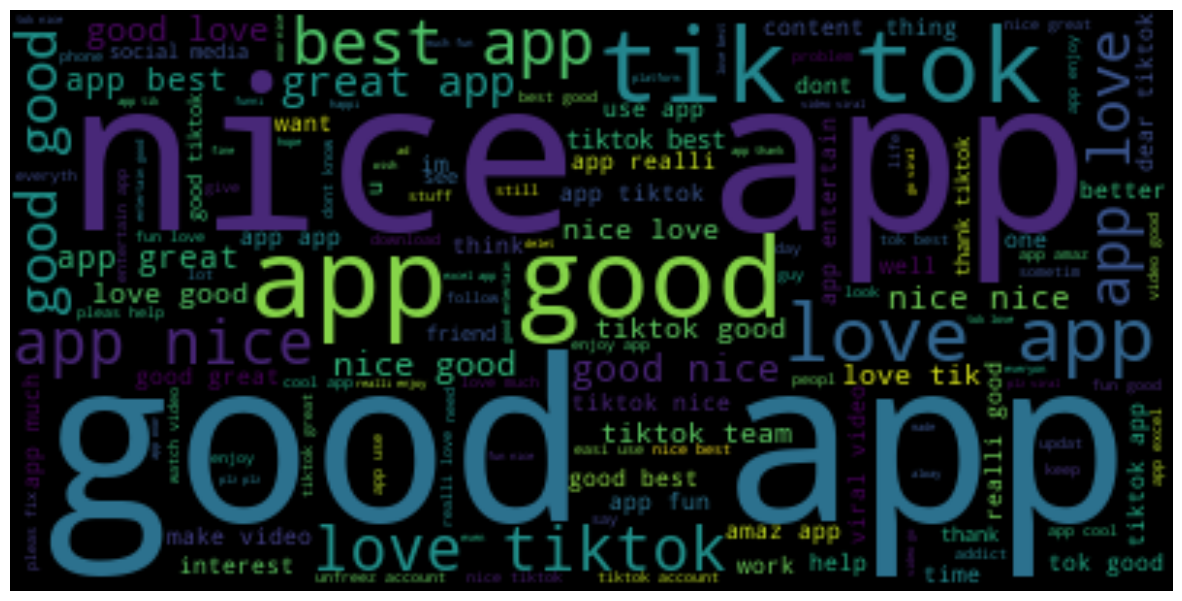

In [12]:
positive =' '.join([i for i in data['content'][data['Positive'] > data["Negative"]]])
stopwords=set(STOPWORDS)
wordcloud=WordCloud(stopwords=stopwords,background_color="black").generate(positive)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

###### The line `positive = ' '.join([i for i in data['content'][data['Positive'] > data["Negative"]]])` performs a list comprehension to concatenate the text from the 'content' column of the `data` DataFrame, but only for rows where the positive sentiment score is greater than the negative sentiment score. Let's break it down:

1. `positive = `: This line initializes a variable named 'positive' to store the concatenated text.

2. `' '.join([...])`: This part of the line joins the elements of a list into a single string, separated by a space.

3. `[i for i in data['content'][data['Positive'] > data["Negative"]]]`: This is a list comprehension that iterates over the 'content' column of the `data` DataFrame, but only for rows where the positive sentiment score is greater than the negative sentiment score. It creates a list of these selected text values.

4. Overall, the line selects the text values from the 'content' column where the positive sentiment score is higher than the negative sentiment score and concatenates them into a single string, with each text separated by a space.

The resulting string stored in the 'positive' variable represents the combined text of the selected rows that have a higher positive sentiment compared to negative sentiment.

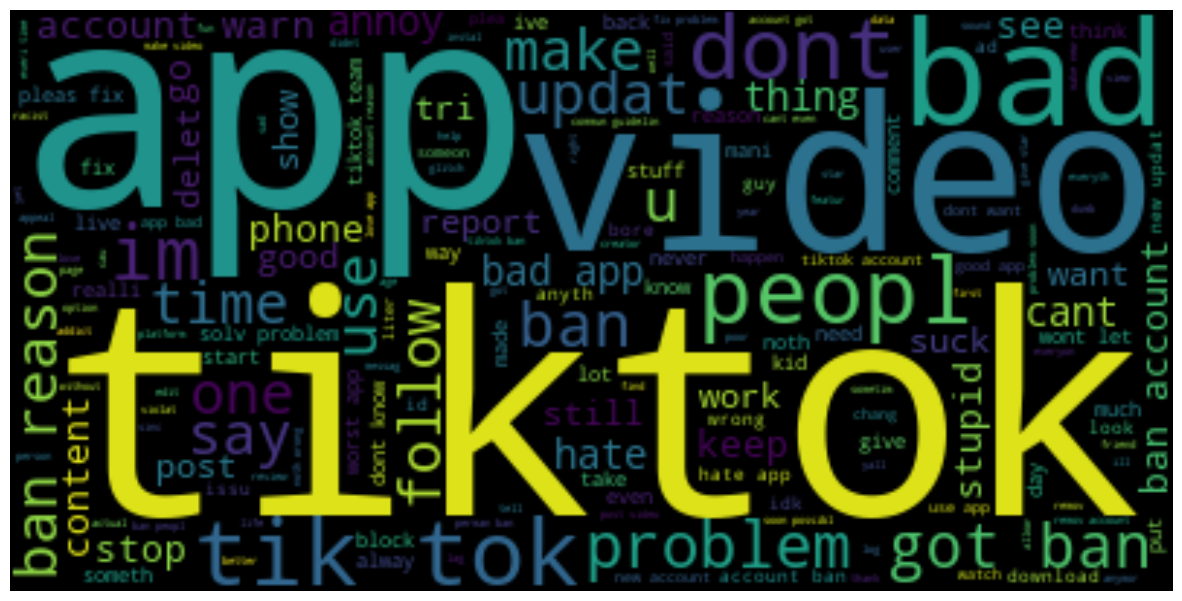

In [13]:
negative =' '.join([i for i in data['content'][data['Negative'] > data["Positive"]]])
stopwords=set(STOPWORDS)
wordcloud=WordCloud(stopwords=stopwords,background_color="black").generate(negative)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()